In [363]:
import pandas as pd
import statistics as s
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import seaborn as sns

In [367]:
# Set major parameters

mean = 120 # Mean speed of traffic
max = 160 # Max speed of traffic. I use a truncated normal distribution to avoind having cars going 200 km/h, etc.
min = 70 # Min speed of traffic. Again, truncated normal. No-one gets to park on the freeway.
stdev = 0.15*mean #Standard NHTSA number for highway traffic 
v2 = 120 # Fixed speed of vehicle 2
window = 15 # How long is vehicle 2 driving in minutes. Shorter time lets you model a more realistic entry/exit of other cars.
train = 10000 # Length of highway behinds us. Play with it with driving window as guide.
density = 60 # California average is 60 on busier roads
num = int(train/1000*density) # How many cars behind, givn California average number of active vehicles per km 


In [381]:
# Create velocity distribution. It's truncated normal distribution, to avoid freakish speeds. 
a = (left - mean)/stdev
b = (right - mean)/stdev
speeds = truncnorm.rvs(a, b, mean, stdev, size=num)
df = pd.DataFrame (speeds, columns = ['v1'])

# Create object distribution
gaps = np.random.uniform(1,train,num)
df['gap'] = gaps.tolist()

# Complete dataframe with columns for distance and time required to catch
df['dist'] = df['gap']/(df["v1"]/v2-1)
df['time']= df['dist'] / 120000*60

Mean passing speed of cars: 140.0
Total cars on road: 600
Number of cars that passed in 15 minutes: 123
Cars/minute that passed: 8.0
Max speed: 159.9
Min speed: 81.5


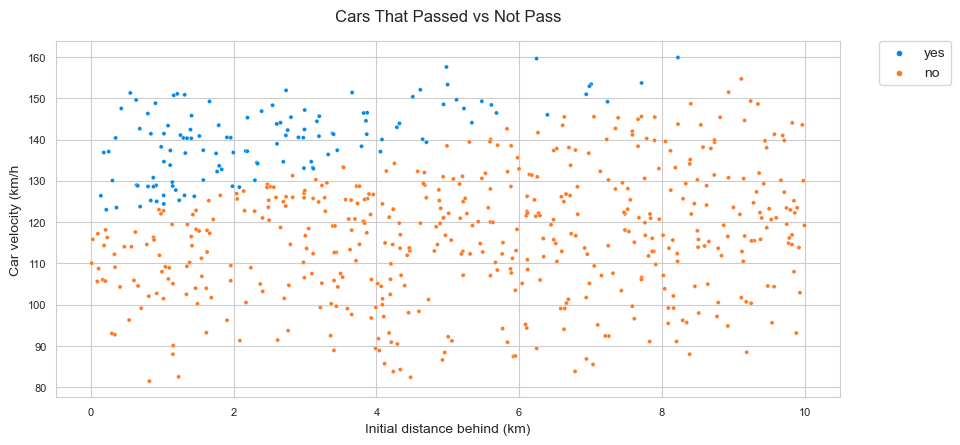

In [387]:
# Process data

mean_passing_speed = df.loc[df['time'].between(0, window), 'v1'].mean()
numcars = df.loc[df['time'].between(0, window), 'v1'].count()
df['passed'] = 'no'
df.loc[(df['time'] >= 0) & (df['time'] <= window), 'passed'] = 'yes'

# Return results 
print("Mean passing speed of cars:","{:.1f}".format(mean_passing_speed))
print("Total cars on road:",num)
print("Number of cars that passed in",window, "minutes:", numcars)
print("Cars/minute that passed:","{:.1f}".format(int(numcars/window)))
print("Max speed:","{:.1f}".format(df['v1'].max()))
print("Min speed:","{:.1f}".format(df['v1'].min()))


# Set up a plot (which is outrageously fiddly)
x = df['gap']/1000
y = df['v1']
plt.gcf().set_size_inches(8, 4)
sns.scatterplot(x=x, y='v1',data=df,hue='passed')

plt.subplots_adjust(top=.9)
plt.suptitle('Cars That Passed vs Not Pass')
plt.xlabel("Initial distance behind (km)")
plt.ylabel("Car velocity (km/h")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
# g.axhline(mean,lw=5)
plt.show()

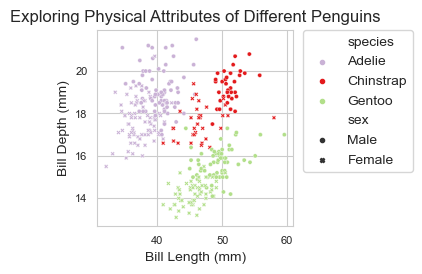